# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_colwidth', 150)
pd.set_option('max_rows', 100)

# Dataset Overview

Source : https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
print(f'This dataset contains of {df.shape[0]} Rows and {df.shape[1]} Columns')

This dataset contains of 5000 Rows and 14 Columns


In [4]:
# check missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
# check duplicated values
df.duplicated().sum()

0

In [8]:
# drop ID and ZIP Code
df = df.drop(['ID', 'ZIP Code'], axis=1)
df.shape

(5000, 12)

# EDA

In [9]:
# copy dataset
eda = df.copy()

# define numeric and categoric features
num = eda.select_dtypes(include='number').columns
cat = eda.select_dtypes(include='object').columns

In [11]:
cat

Index([], dtype='object')

Unfortunately No categorical values

## Descriptive Statistics

In [10]:
eda[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


## Univariate Analysis

In [13]:
len(num)

12

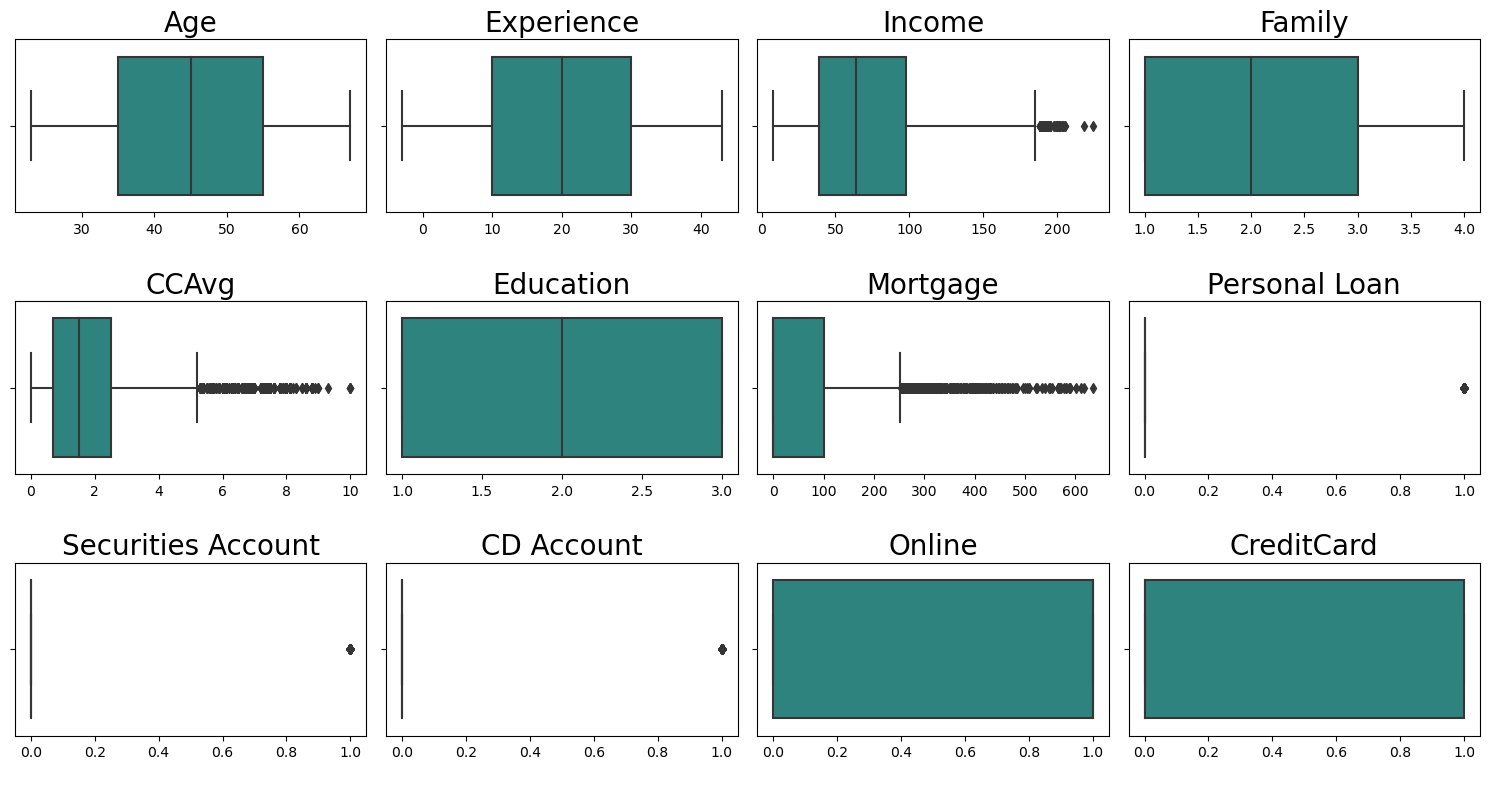

In [15]:
plt.figure(figsize=(15,8))
for i in range(0, len(num)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

Seems no extreme values, all values look normal. Some outlier detected on Income feature, but we will consider it as normal values

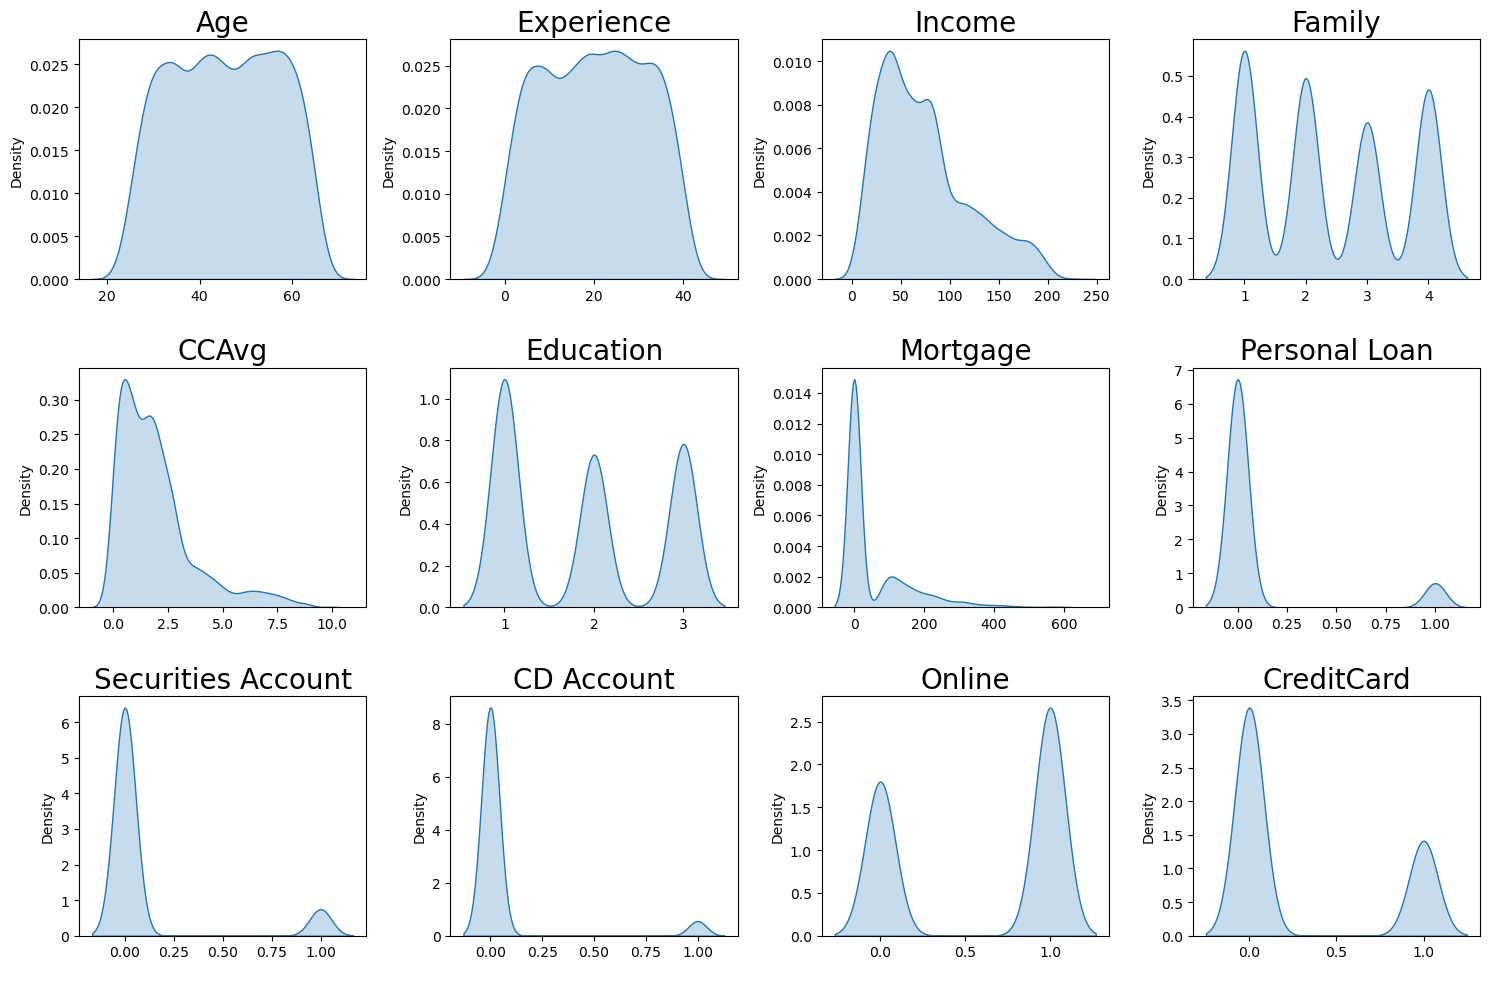

In [18]:
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

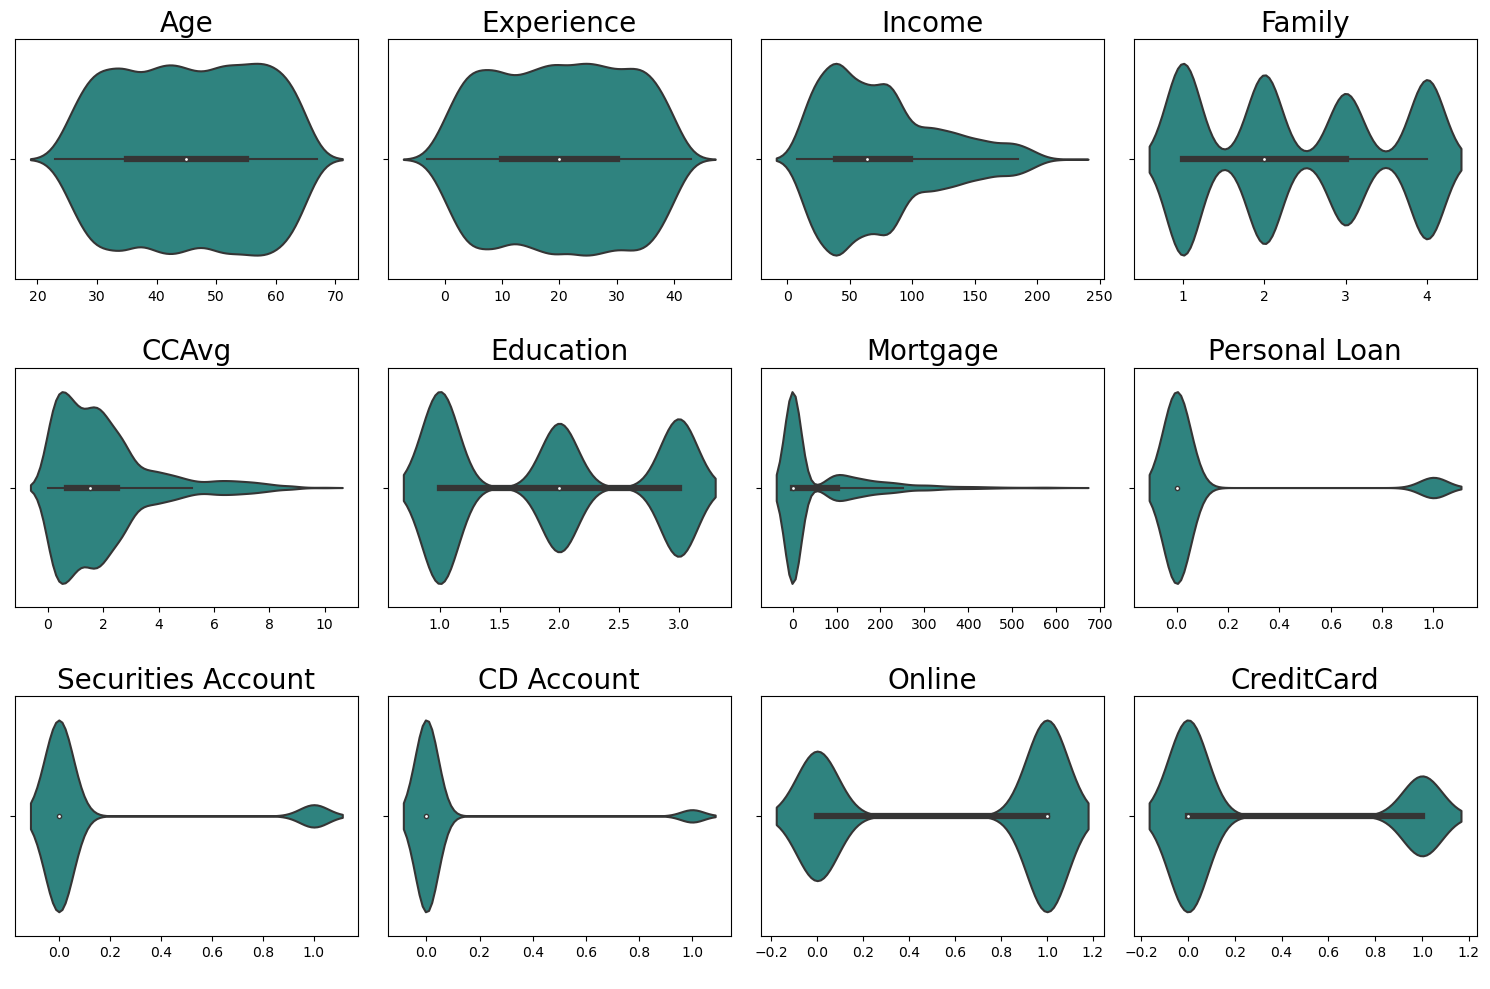

In [17]:
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3,4,i+1)
    sns.violinplot(x=eda[num[i]], palette='viridis', hue=eda['Personal Loan'], shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis

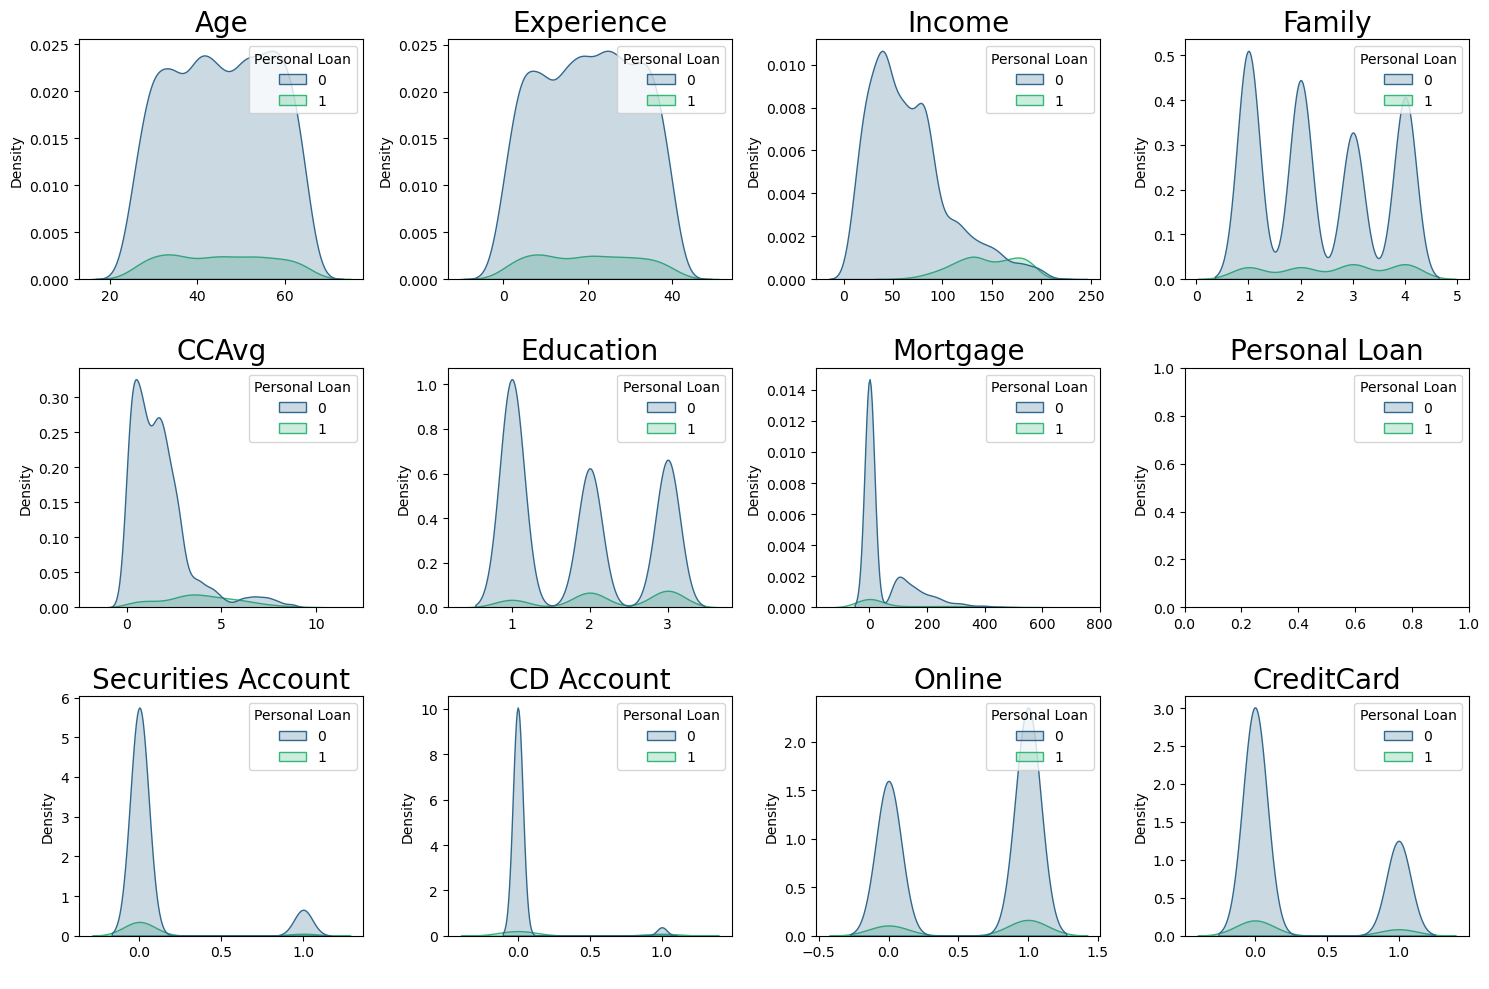

In [19]:
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', hue=eda['Personal Loan'], shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

## Correlation Heatmap

<AxesSubplot:>

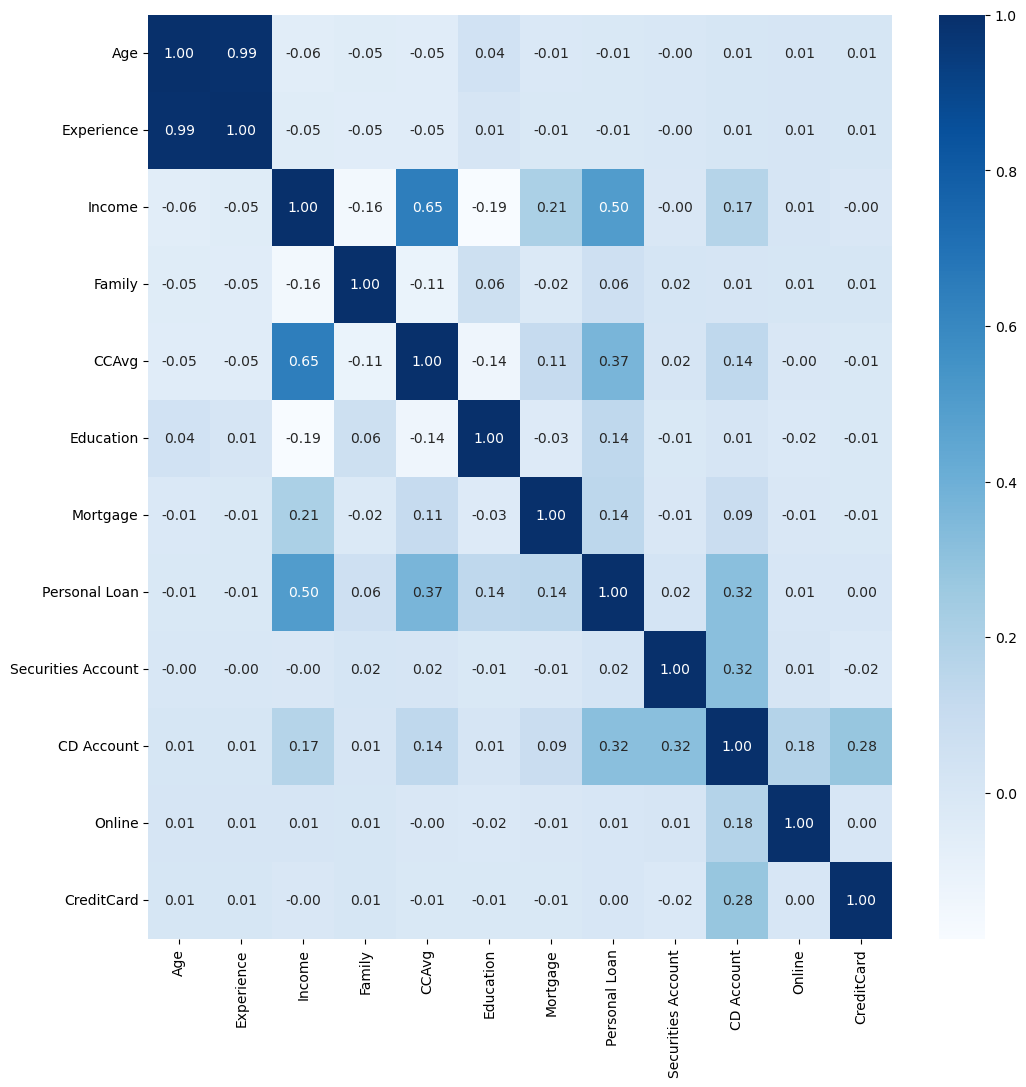

In [20]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(12, 12))
sns.heatmap(eda.corr(), cmap='Blues', annot=True, fmt='.2f')

# Data Preprocessing

## Data Splitting

In [22]:
from sklearn.model_selection import train_test_split

# let's separate into training and testing set
x_train, x_test, y_train, y_test = train_test_split(df.drop('Personal Loan', axis=1),
                                                    df['Personal Loan'],
                                                    test_size=0.3,
                                                    random_state=123)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

In [24]:
df['Personal Loan'].value_counts()/len(df)*100

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

# Modeling

## Logistic Regression

In [57]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=40)],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] }


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression(class_weight={0:0.1,1:1})

# search
lr_clf = GridSearchCV(lr,
                      param,
                      scoring='precision',
                      cv=skf,
                      refit=True) 

search_lr = lr_clf.fit(x_train,y_train)

# best hyperparameters
search_lr.best_params_

{'C': 0.923076923076923, 'penalty': 'l2', 'solver': 'newton-cg'}

In [58]:
best_params = search_lr.best_params_
logreg = LogisticRegression(**best_params)
logreg.fit(x_train,y_train)

LogisticRegression(C=0.923076923076923, solver='newton-cg')

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, fbeta_score, make_scorer

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

print('TRAINING RESULT:')
print('======================================================')
print('Precision Score:', np.round(precision_score(y_train, y_train_pred),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('Precision Score:', np.round(precision_score(y_test, y_test_pred),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
Precision Score: 0.802
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3166
           1       0.80      0.60      0.69       334

    accuracy                           0.95      3500
   macro avg       0.88      0.79      0.83      3500
weighted avg       0.94      0.95      0.94      3500

Confussion Matrix ------------------------------------
[[3116   50]
 [ 132  202]]


TESTING RESULT:
Precision Score: 0.872
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1354
           1       0.87      0.65      0.75       146

    accuracy                           0.96      1500
   macro avg       0.92      0.82      0.86      1500
weighted avg       0.95      0.96      0.95      1500

Confussion Matrix ------------------------------------
[[1340   14]
 [  5

## Find Pvalues using statsmodel

In [71]:
import statsmodels.api as sm

X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Personal Loan   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     194.6
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        02:41:32   Log-Likelihood:                 157.96
No. Observations:                3500   AIC:                            -291.9
Df Residuals:                    3488   BIC:                            -218.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2985      0

P-value of `Age` and `Experience` is larger than 0.05 (5%), we are not gonna use those features as our recommendation

## Feature Importance

In [60]:
def get_feature_importance(clf, feature_name):
    feature_importance = (
    pd.DataFrame(
    { 'variable': feature_name,
      'coefficient': clf.coef_[0]
    }
    ).round(decimals=2)\
     .sort_values('coefficient', ascending=False)\
     .style.bar(color=['red','green'], align='zero')
    )
    return feature_importance

In [61]:
get_feature_importance(logreg, x_train.columns)

,variable,coefficient
8,CD Account,3.060000
5,Education,1.550000
3,Family,0.730000
4,CCAvg,0.090000
2,Income,0.050000
1,Experience,0.010000
0,Age,-0.000000
6,Mortgage,0.000000
7,Securities Account,-0.560000
9,Online,-0.570000


**NOTE** <br>
We cannot interpret magnitudes of the coefficients to quantify associations between the dependent variable and independent variable directly

**Then How?** <br>
We wiill find the Odds Ratio through this method :

Text(100, 80, '8')

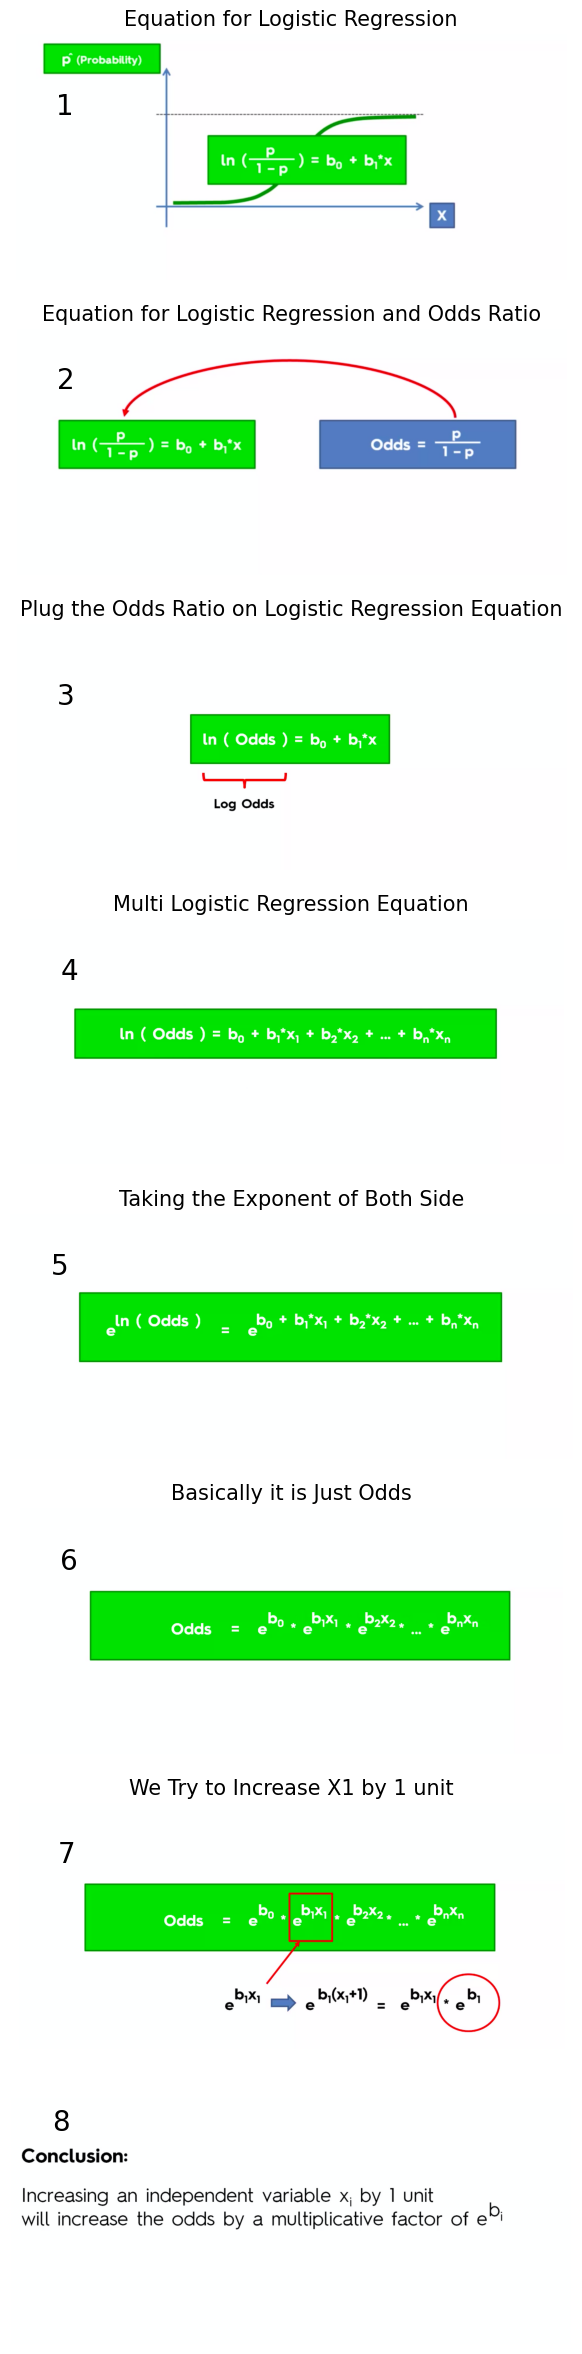

In [97]:
from matplotlib import image

# create figure
fig = plt.figure(figsize=(20, 30))

# setting values to rows and column variables
rows = 8
columns = 1

# images
img1 = image.imread('satu.png')
img2 = image.imread('dua.png')
img3 = image.imread('tiga.png')
img4 = image.imread('empat.png')
img5 = image.imread('lima.png')
img6 = image.imread('enam.png')
img7 = image.imread('tujuh.png')
img8 = image.imread('delapan.png')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img1)
plt.axis('off')
plt.text(x=100,y=200,s='1', fontsize=20)
plt.title('Equation for Logistic Regression', fontsize=15)

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(img2)
plt.axis('off')
plt.text(x=100,y=150,s='2', fontsize=20)
plt.title('Equation for Logistic Regression and Odds Ratio', fontsize=15)

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(img3)
plt.axis('off')
plt.text(x=100,y=200,s='3', fontsize=20)
plt.title('Plug the Odds Ratio on Logistic Regression Equation', fontsize=15)

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(img4)
plt.axis('off')
plt.text(x=100,y=150,s='4', fontsize=20)
plt.title('Multi Logistic Regression Equation', fontsize=15)

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(img5)
plt.axis('off')
plt.text(x=100,y=150,s='5', fontsize=20)
plt.title('Taking the Exponent of Both Side', fontsize=15)

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(img6)
plt.axis('off')
plt.text(x=100,y=150,s='6', fontsize=20)
plt.title('Basically it is Just Odds', fontsize=15)

# Adds a subplot at the 7th position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(img7)
plt.axis('off')
plt.text(x=100,y=150,s='7', fontsize=20)
plt.title('We Try to Increase X1 by 1 unit', fontsize=15)

# Adds a subplot at the 8th position
fig.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(img8)
plt.axis('off')
plt.text(x=100,y=80,s='8', fontsize=20)

## Feature Odds Ratio

In [103]:
get_feature_importance(logreg, x_train.columns)

,variable,coefficient
8,CD Account,3.060000
5,Education,1.550000
3,Family,0.730000
4,CCAvg,0.090000
2,Income,0.050000
1,Experience,0.010000
0,Age,-0.000000
6,Mortgage,0.000000
7,Securities Account,-0.560000
9,Online,-0.570000


In [106]:
# create new dataframe (because get_feature_importance has Styler)
data_importance = {'Variable': ['CD Account','Education','Family',
                                'CCAvg','Income','Experience','Age',
                                'Mortage','Securities Account','Online',
                                'CreditCard'],
                   'Coefficient': [3.060000,1.550000,0.730000,0.090000,
                                   0.050000,0.010000,-0.000000,0.000000,
                                   -0.560000,-0.570000,-0.820000]}

# show all 6 digits after comma
pd.options.display.float_format = '{:,.6f}'.format

# print df
df_importance = pd.DataFrame(data_importance)
df_importance

,Variable,Coefficient
0,CD Account,3.060000
1,Education,1.550000
2,Family,0.730000
3,CCAvg,0.090000
4,Income,0.050000
5,Experience,0.010000
6,Age,-0.000000
7,Mortage,0.000000
8,Securities Account,-0.560000
9,Online,-0.570000


In [113]:
df_importance['Odds_Ratio'] = np.exp(df_importance['Coefficient'])
df_importance

,Variable,Coefficient,Odds_Ratio
0,CD Account,3.060000,21.327557
1,Education,1.550000,4.711470
2,Family,0.730000,2.075081
3,CCAvg,0.090000,1.094174
4,Income,0.050000,1.051271
5,Experience,0.010000,1.010050
6,Age,-0.000000,1.000000
7,Mortage,0.000000,1.000000
8,Securities Account,-0.560000,0.571209
9,Online,-0.570000,0.565525


**Dictionary :**
- `CD Account` : Does the customer have a certificate of deposit (CD) account with the bank?
- `Education` : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- `Family` : Family size of the customer
- `Securities Account` : Does the customer use internet banking facilities?
- `Online` : Does the customer use internet banking facilities?
- `CreditCard` : Does the customer use a credit card issued by this Bank?


## Insights

1. If the customers have certifcate of deposite (`CD Account`), their odds of accepting personal loan will **increase** by 21.32 times
2. If the customer have higher education level (`Education`), their odds of accepting personal loan will **increase** by 4.71 times
3. If the customer have bigger size family member (`Family`), their odds of accepting personal loan will **increase** 2.07 times
4. If the customer use `Securities Account`, their odds of accepting personal loan will **decrease** by 0.57 times
5. If the customer use `Online `internet banking, their odds of accepting personal loan will **decrese** by 0.56 times
6. If the customers use `CreditCard` isssued by the bank, their odds of accepting personal loan will **decrease** by 0.44 times

# Simulation

<AxesSubplot:>

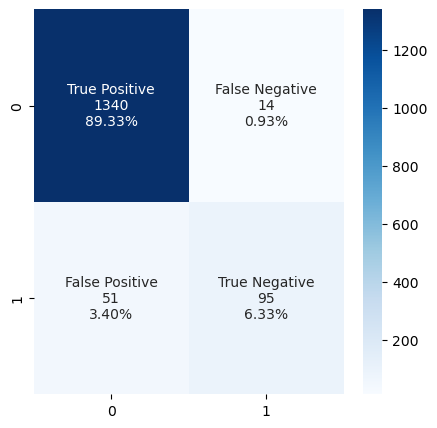

In [143]:
cf_matrix = confusion_matrix(y_test, y_test_pred)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(5, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## If All customers (5000 customers) have Certificate of Deposite

In [154]:
simulation_features=x_train.columns

tp, fn, fp, tn = cf_matrix.flatten()

# Create Simulation Data
df_response = df[df['Personal Loan'] == 1][simulation_features]
df_not_response = df[df['Personal Loan'] == 0][simulation_features]

# Create Improvement Experiments
experiments = np.arange(-1,1.05,0.05)
experiments[20] = 0
    
df_simulation = pd.concat([df_response.sample(int(np.ceil(1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
df_simulation['CD Account'] = 1
#df_simulation['Education'] = df_simulation['Education']*1.20
#df_simulation['Family'] = df_simulation['Family']*1.20

    
# Predict Simulation Values
simulation_pred = logreg.predict(df_simulation)

# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
# Calculate Simulation Conversion Rate
new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

# Current Condition
current_cr = df['Personal Loan'].value_counts()[1]/df['Personal Loan'].shape[0]

print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Simulation Conversion Rate After Recommendation = {new_cr *100:.2f}%')
print('Customer Conversion Rate Increment = ', round((new_cr *100)-(current_cr *100),2))

Current Conversion Rate = 9.60%
Simulation Conversion Rate After Recommendation = 24.84%
Customer Conversion Rate Increment =  15.24


## If All customers (5000 customers) are Graduate

In [156]:
simulation_features=x_train.columns

tp, fn, fp, tn = cf_matrix.flatten()

# Create Simulation Data
df_response = df[df['Personal Loan'] == 1][simulation_features]
df_not_response = df[df['Personal Loan'] == 0][simulation_features]

# Create Improvement Experiments
experiments = np.arange(-1,1.05,0.05)
experiments[20] = 0
    
df_simulation = pd.concat([df_response.sample(int(np.ceil(1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
#df_simulation['CD Account'] = 1
df_simulation['Education'] = 2
#df_simulation['Family'] = df_simulation['Family']*1.20

    
# Predict Simulation Values
simulation_pred = logreg.predict(df_simulation)

# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
# Calculate Simulation Conversion Rate
new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

# Current Condition
current_cr = df['Personal Loan'].value_counts()[1]/df['Personal Loan'].shape[0]

print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Simulation Conversion Rate After Recommendation = {new_cr *100:.2f}%')
print('Customer Conversion Rate Increment = ', round((new_cr *100)-(current_cr *100),2))

Current Conversion Rate = 9.60%
Simulation Conversion Rate After Recommendation = 10.90%
Customer Conversion Rate Increment =  1.3


## If All customers (5000 customers) are Professional

In [157]:
simulation_features=x_train.columns

tp, fn, fp, tn = cf_matrix.flatten()

# Create Simulation Data
df_response = df[df['Personal Loan'] == 1][simulation_features]
df_not_response = df[df['Personal Loan'] == 0][simulation_features]

# Create Improvement Experiments
experiments = np.arange(-1,1.05,0.05)
experiments[20] = 0
    
df_simulation = pd.concat([df_response.sample(int(np.ceil(1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
#df_simulation['CD Account'] = 1
df_simulation['Education'] = 3
#df_simulation['Family'] = df_simulation['Family']*1.20

    
# Predict Simulation Values
simulation_pred = logreg.predict(df_simulation)

# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
# Calculate Simulation Conversion Rate
new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

# Current Condition
current_cr = df['Personal Loan'].value_counts()[1]/df['Personal Loan'].shape[0]

print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Simulation Conversion Rate After Recommendation = {new_cr *100:.2f}%')
print('Customer Conversion Rate Increment = ', round((new_cr *100)-(current_cr *100),2))

Current Conversion Rate = 9.60%
Simulation Conversion Rate After Recommendation = 16.56%
Customer Conversion Rate Increment =  6.96


## If All customers (5000 customers) Have Average Family Size 3

In [161]:
simulation_features=x_train.columns

tp, fn, fp, tn = cf_matrix.flatten()

# Create Simulation Data
df_response = df[df['Personal Loan'] == 1][simulation_features]
df_not_response = df[df['Personal Loan'] == 0][simulation_features]

# Create Improvement Experiments
experiments = np.arange(-1,1.05,0.05)
experiments[20] = 0
    
df_simulation = pd.concat([df_response.sample(int(np.ceil(1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
#df_simulation['CD Account'] = 1
#df_simulation['Education'] = 3
df_simulation['Family'] = df_simulation['Family']*1.20

    
# Predict Simulation Values
simulation_pred = logreg.predict(df_simulation)

# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
# Calculate Simulation Conversion Rate
new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

# Current Condition
current_cr = df['Personal Loan'].value_counts()[1]/df['Personal Loan'].shape[0]

print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Simulation Conversion Rate After Recommendation = {new_cr *100:.2f}%')
print('Customer Conversion Rate Increment = ', round((new_cr *100)-(current_cr *100),2))

Current Conversion Rate = 9.60%
Simulation Conversion Rate After Recommendation = 10.74%
Customer Conversion Rate Increment =  1.14
